In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt

In [3]:
# Parâmetros do sistema de Duffing
delta = 0.1
alpha = 0.0
beta = 1.0
gamma = 5.6
omega = 1.0

# Sistema de Duffing (F(s, t))
def F(s, t):
    x, y = s
    dxdt = y
    dydt = -delta * y - alpha * x - beta * (x**3) + gamma * np.sin(omega * t)
    return [dxdt, dydt]

# Jacobiana do sistema de Duffing (parte autônoma, desprezando forçamento senoidal)
def DF(s):
    x, y = s
    return np.array([
        [0, 1],
        [-alpha - 3 * beta * (x**2), -delta]
    ])

In [4]:
# Jacobiana do acoplamento
def DH(s):
    return np.array([
        [0, 1],
        [0, 0]
    ])

In [5]:
def MSF(r, t_span=(0, 10**3), dt=0.001):
    t = np.arange(t_span[0], t_span[1], dt)
    s0 = [1.0, 1.0]  # Condição inicial para o sistema de Duffing (x, y)
    s_t = odeint(F, s0, t)  # Solução do sistema não acoplado

    xi = np.random.rand(2)  # Vetor de perturbação inicial
    xi /= np.linalg.norm(xi)  # Normalização
    LE = 0.0  # Inicializa o expoente de Lyapunov

    for i in range(1, len(t)):
        J = DF(s_t[i]) - r * DH(s_t[i])  # Jacobiano variacional
        xi = np.dot(np.eye(2) + dt * J, xi)  # Evolução linear de xi
        xi_norm = np.linalg.norm(xi)
        LE += np.log(xi_norm)
        xi /= xi_norm  # Renormaliza

    return LE / (len(t) * dt)  # Retorna o expoente médio

In [6]:
# Intervalo de r = sigma * lambda_k
r_values = np.linspace(0, 10, 3*(10**2))
LE_values = [MSF(r) for r in r_values]

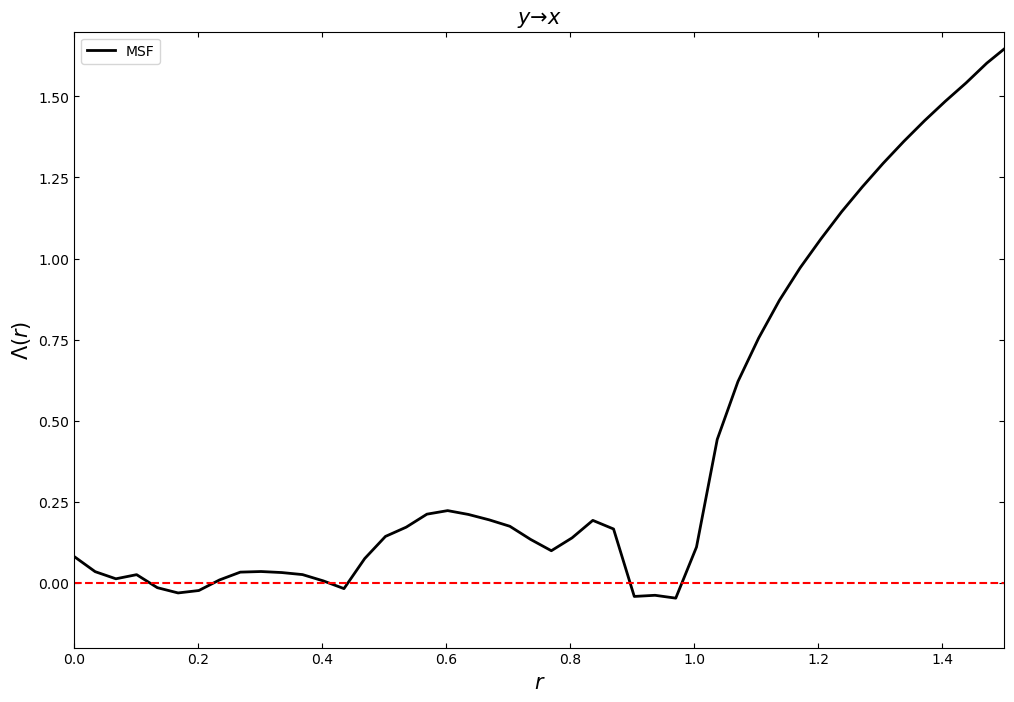

In [31]:
# Plotar MSF
plt.figure(figsize=(12, 8))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 1.5)
plt.ylim(-0.2, 1.7)
plt.xlabel(r'$r$', fontsize=15)
plt.ylabel(r'$\Lambda(r)$', fontsize=15)
plt.title(r'$y \to x$', fontsize=15)
plt.legend()
plt.grid(False)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.show()

In [30]:
# Encontra os pontos onde MSF(r) = 0 usando bisect
r_1 = bisect(lambda r: MSF(r), 0.10, 0.14, rtol=1e-6)
r_2 = bisect(lambda r: MSF(r), 0.20, 0.24, rtol=1e-6)
r_3 = bisect(lambda r: MSF(r), 0.40, 0.42, rtol=1e-6)
r_4 = bisect(lambda r: MSF(r), 0.43, 0.45, rtol=1e-6)
r_5 = bisect(lambda r: MSF(r), 0.80, 0.92, rtol=1e-6)
r_6 = bisect(lambda r: MSF(r), 0.95, 1, rtol=1e-6)



print(f"r_1 = {r_1:.3f}")
print(f"r_2 = {r_2:.3f}")
print(f"r_3 = {r_3:.3f}")
print(f"r_4 = {r_4:.3f}")
print(f"r_5 = {r_5:.3f}")
print(f"r_6 = {r_6:.3f}")

r_1 = 0.125
r_2 = 0.227
r_3 = 0.405
r_4 = 0.448
r_5 = 0.900
r_6 = 1.000


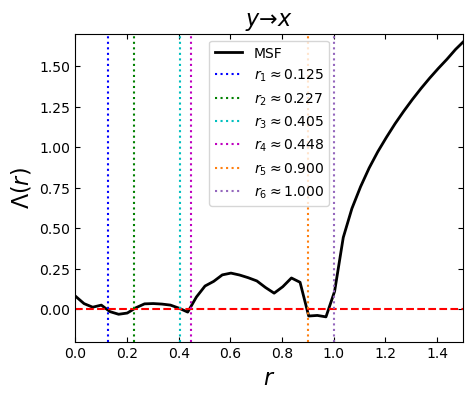

In [35]:
# Gera o novo gráfico da MSF com os pontos onde MSF = 0
fig21=plt.figure(figsize=(5, 4))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.axvline(r_1, color='b', linestyle=':', label=fr'$r_1 \approx {r_1:.3f}$')
plt.axvline(r_2, color='g', linestyle=':', label=fr'$r_2 \approx {r_2:.3f}$')
plt.axvline(r_3, color='c', linestyle=':', label=fr'$r_3 \approx {r_3:.3f}$')
plt.axvline(r_4, color='m', linestyle=':', label=fr'$r_4 \approx {r_4:.3f}$')
plt.axvline(r_5, color='tab:orange', linestyle=':', label=fr'$r_5 \approx {r_5:.3f}$')
plt.axvline(r_6, color='tab:purple', linestyle=':', label=fr'$r_6 \approx {r_6:.3f}$')
plt.xlim(0,1.5)
plt.ylim(-0.2, 1.7)
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'$\Lambda(r)$', fontsize=16)
plt.title(r'$y \to x$', fontsize=16)
plt.legend()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.grid(False)
fig21.savefig('yx.pdf', format='pdf', dpi=300)
plt.show()